In [41]:
# stage 1 prbolem definition
# classfy who can survive

In [42]:
# stage 2 acquire data

import os

data_dir = 'data'
competition_name = 'titanic'

# download data
if not os.path.exists(data_dir):
    os.mkdir(data_dir)
    if os.system(f'cd {data_dir} && kaggle competitions download -c {competition_name} && tar -xzvf {competition_name}.zip') != 0:
        print('download data error')

import numpy as np
import pandas as pd

train_df = pd.read_csv('./data/train.csv', index_col='PassengerId')
test_df = pd.read_csv('./data/test.csv', index_col='PassengerId')

['Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch' 'Ticket' 'Fare'
 'Cabin' 'Embarked']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB
None
         Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.

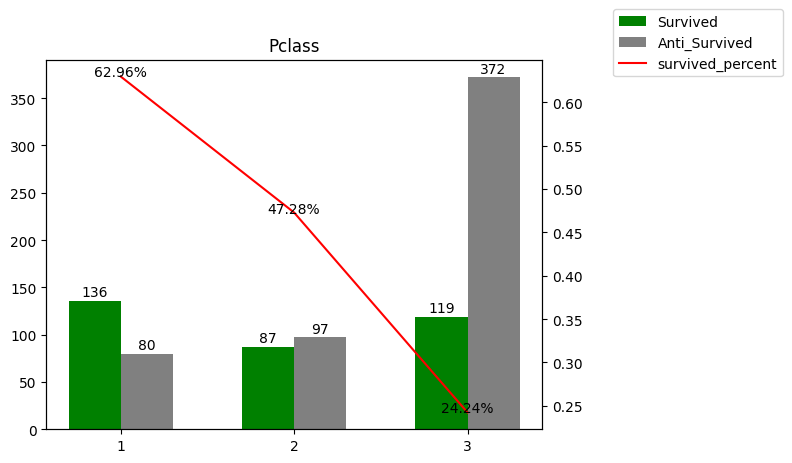

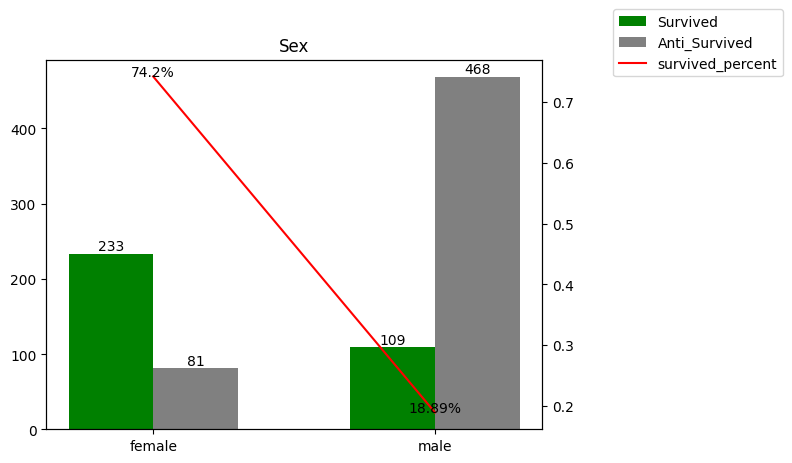

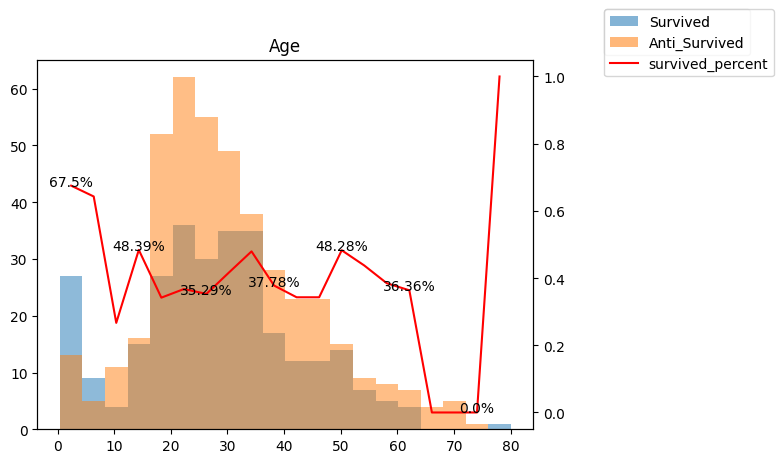

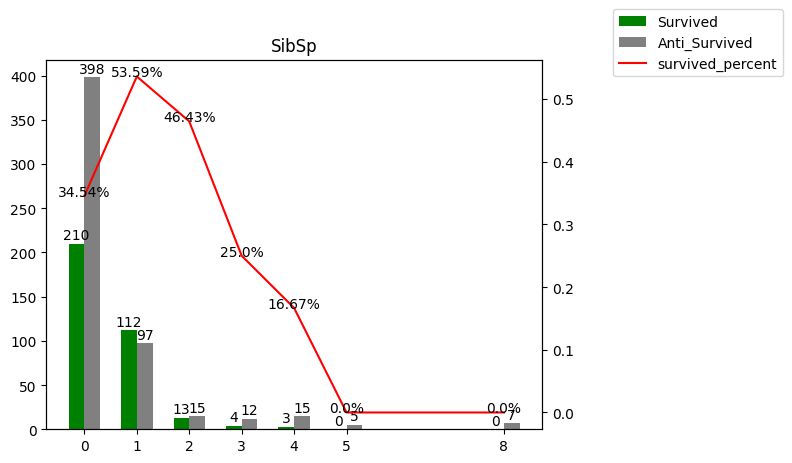

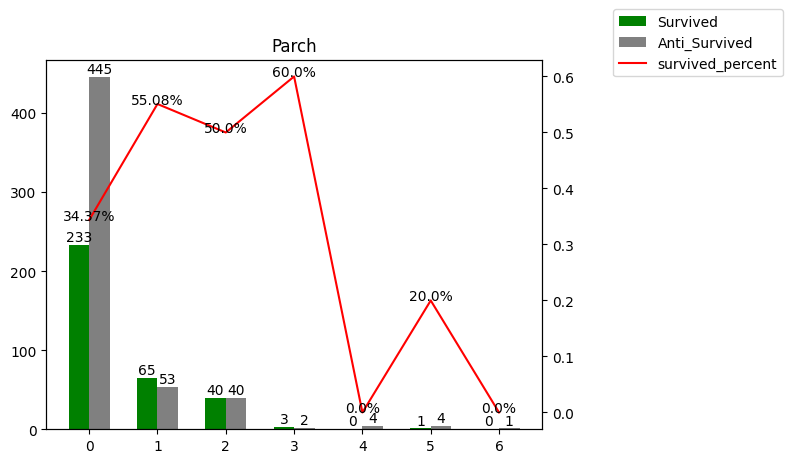

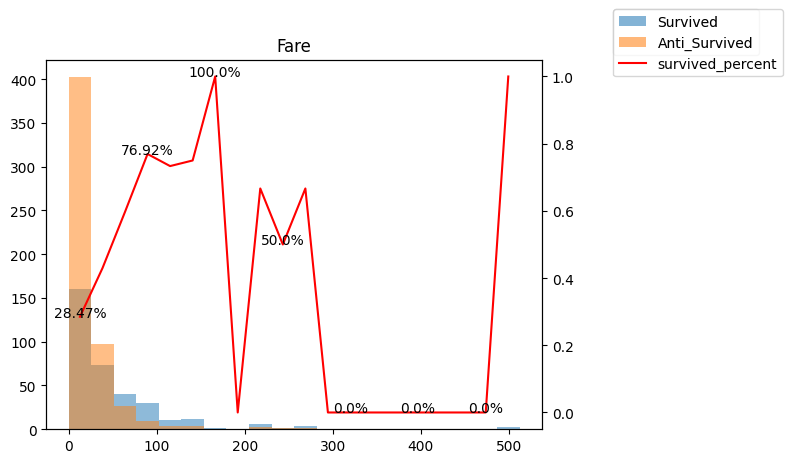

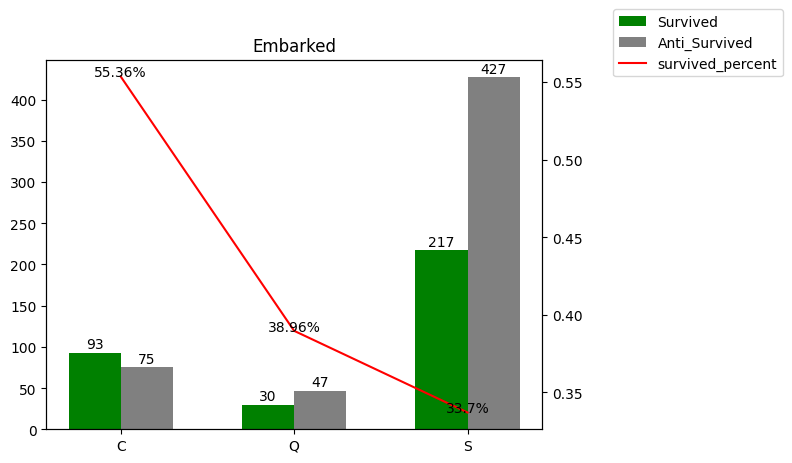

In [43]:
# stage 3 read data and analyze data

import matplotlib.pyplot as plt

print(train_df.columns.values)
print(train_df.info())
print(train_df.describe()) # 连续型数据量统计
print(train_df.describe(include=['O'])) # 离散型数据量统计

# 分布统计表
# for column in train_df.columns:
#     target = 'Survived'
#     if column != target:
#         statistic = train_df[[column, target]].groupby([column], as_index=False).mean().sort_values(by=target, ascending=False)
#         print(statistic)
#         print()

def draw_bar(column, df, target):
    anti_target = f'Anti_{target}'
    percent = 'Percent'
    total_count = df[[column, target]].groupby([column]).count()
    survived = df[[column, target]].groupby([column]).sum()
    survived[anti_target] = pd.Series(total_count[target]) - pd.Series(survived[target])
    survived[percent] = pd.Series(survived[target]) / pd.Series(total_count[target])

    fig = plt.figure()
    ax = fig.add_subplot(111)
    x_index = survived.index
    if x_index.dtype == 'object':
        x_index = np.arange(len(survived.index))
        ax.set_xticks(x_index)
        ax.set_xticklabels(survived.index)
    else:
        ax.set_xticks(x_index)
    width = 0.3
    ax.bar(x_index-width/2, survived[target], label=target, width=width, color='green')
    ax.bar(x_index+width/2, survived[anti_target], label=anti_target, width=width, color='grey')

    for x, y1, y2 in zip(x_index, survived[target], survived[anti_target]):
        plt.text(x-width/2, y1+5, str(y1), ha='center')
        plt.text(x+width/2, y2+5, str(y2), ha='center')

    ax_percent = ax.twinx()
    ax_percent.plot(x_index, survived[percent], label = 'survived_percent', color='red')
    for x, y in zip(x_index, survived[percent]):
        plt.text(x, y, str(round(y * 100, 2))+'%', ha='center')

    fig.legend(loc=2, bbox_to_anchor=(1,1))
    plt.title(column)
    plt.show()


def draw_hist(column: str, df: pd.DataFrame, target: str):
    anti_target = f'Anti_{target}'
    percent = 'Percent'
    df = df[[column, target]]
    target_column = df[df[target] == 1]
    anti_target_column = df[df[target] == 0]
    x_min, x_max = min(target_column[column].min(), anti_target_column[column].min()), max(target_column[column].max(), anti_target_column[column].max())
    fig = plt.figure()
    ax = fig.add_subplot(111)
    target_n, bins, patches = ax.hist(target_column[column], 20, alpha=0.5, label=target, range=(x_min, x_max))
    anti_target_n, anti_bins, anti_patches = ax.hist(anti_target_column[column], 20, alpha=0.5, label=anti_target, range=(x_min, x_max))
    fig.legend(loc=2, bbox_to_anchor=(1,1))

    ax_percent = ax.twinx()
    total = (np.array(anti_target_n) + np.array(target_n))
    total[np.where(total == 0)] = 1
    percent = np.array(target_n) / total
    bins = np.array(bins)
    x_index = (bins[:-1] + bins[1:]) / 2
    ax_percent.plot(x_index, percent, label = 'survived_percent', color='red')
    for x, y in zip(x_index[::3], percent[::3]):
        plt.text(x, y, str(round(y * 100, 2))+'%', ha='center')

    fig.legend(loc=2, bbox_to_anchor=(1,1))
    plt.title(column)


# 分布统计图
for column in train_df.columns:
    target = 'Survived'
    bar_columns = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
    hist_columns = ['Age', 'Fare']
    try:
        if column in bar_columns:
            draw_bar(column, train_df, target)
        if column in hist_columns:
            draw_hist(column, train_df, target)
            
    except Exception as e:
        print(e)
        continue


In [44]:
# submit
result_file = 'gender_submission.csv'
os.system(f'cd {data_dir} && kaggle competitions submit -c {competition_name} -f {result_file} -m "submit"')
os.system(f'kaggle competitions submissions {competition_name}')

  0%|          | 0.00/3.18k [00:00<?, ?B/s]2023-01-17 01:01:30,502 WARNING Retrying (Retry(total=9, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:997)'))': /upload/storage/v1/b/kaggle-competitions-submissions/o?uploadType=resumable&upload_id=ADPycdvLzXn_IUfrgHshBgGe6DBM2QhgbDa_W-taTMYnq0hmRKJlhGNfmXKIMWQxyT1nVBKe_ttqCJu8axNMNTStG0PjdQ
2023-01-17 01:01:36,572 WARNING Retrying (Retry(total=8, connect=None, read=None, redirect=None, status=None)) after connection broken by 'SSLError(SSLError(1, '[SSL: WRONG_VERSION_NUMBER] wrong version number (_ssl.c:997)'))': /upload/storage/v1/b/kaggle-competitions-submissions/o?uploadType=resumable&upload_id=ADPycdvLzXn_IUfrgHshBgGe6DBM2QhgbDa_W-taTMYnq0hmRKJlhGNfmXKIMWQxyT1nVBKe_ttqCJu8axNMNTStG0PjdQ
100%|██████████| 3.18k/3.18k [00:14<00:00, 220B/s]


Successfully submitted to Titanic - Machine Learning from DisasterfileName               date                 description  status    publicScore  privateScore  
---------------------  -------------------  -----------  --------  -----------  ------------  
gender_submission.csv  2023-01-16 17:01:40  submit       complete  0.76555                    
gender_submission.csv  2023-01-15 07:22:44  submit       complete  0.76555                    
gender_submission.csv  2023-01-15 06:20:15  submit       complete  0.76555                    
gender_submission.csv  2023-01-15 06:13:12  test         complete  0.76555                    
gender_submission.csv  2023-01-15 05:58:15  test         complete  0.76555                    


0